<a href="https://colab.research.google.com/github/NimmyBibin/APS_fault_detection/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow

In [3]:
print(tensorflow.__version__)

2.12.0


In [4]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#importing the dataset
df=pd.read_csv("/content/aps_data.csv")

<ipython-input-5-6cc91eeca396>:2: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/aps_data.csv")


In [6]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [7]:
df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [8]:
df.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [9]:
np.nan

nan

In [10]:
df=df.replace("na",np.nan)

In [11]:
df.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
          ... 
ee_007      58
ee_008      58
ee_009      58
ef_000     242
eg_000     242
Length: 171, dtype: int64

In [12]:
df.isnull().sum().sum()

71649

In [13]:
pd.options.display.max_rows=1000

In [14]:
df.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
ae_000     224
af_000     224
ag_000      58
ag_001      58
ag_002      58
ag_003      58
ag_004      58
ag_005      58
ag_006      58
ag_007      58
ag_008      58
ag_009      58
ah_000      60
ai_000      56
aj_000      56
ak_000     384
al_000      65
am_0        56
an_000      65
ao_000      53
ap_000      65
aq_000      53
ar_000     242
as_000      56
at_000      56
au_000      56
av_000     224
ax_000     224
ay_000      58
ay_001      58
ay_002      58
ay_003      58
ay_004      58
ay_005      58
ay_006      58
ay_007      58
ay_008      58
ay_009      58
az_000      58
az_001      58
az_002      58
az_003      58
az_004      58
az_005      58
az_006      58
az_007      58
az_008      58
az_009      58
ba_000      61
ba_001      61
ba_002      61
ba_003      61
ba_004      61
ba_005      61
ba_006      61
ba_007      61
ba_008      61
ba_009      61
bb_000      60
bc_000     243
bd_000     243
be_000    

In [15]:
df.isnull().sum().sort_values(ascending=False)

br_000    4105
bq_000    4043
bp_000    3960
ab_000    3849
cr_000    3849
bo_000    3832
bn_000    3631
bm_000    3273
bl_000    2234
bk_000    1880
ch_000    1236
co_000    1236
cf_000    1236
cg_000    1236
ad_000    1236
db_000    1150
ct_000    1150
cu_000    1150
cv_000    1150
cx_000    1150
cy_000    1150
cz_000    1150
da_000    1150
dc_000    1150
ec_00      837
cm_000     796
cl_000     778
ed_000     778
ak_000     384
ca_000     383
di_000     361
df_000     361
dg_000     361
dh_000     361
eb_000     361
dk_000     361
dl_000     361
dm_000     361
dj_000     361
ac_000     308
cc_000     288
bx_000     288
do_000     243
bc_000     243
bd_000     243
dt_000     243
du_000     243
dv_000     243
ds_000     243
dp_000     243
dq_000     243
dr_000     243
ar_000     242
ea_000     242
ef_000     242
de_000     242
bz_000     242
eg_000     242
dz_000     242
dy_000     242
dx_000     242
cp_000     242
be_000     225
ce_000     224
ae_000     224
af_000     224
av_000    

In [16]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).rename(columns={0:"null value count"})

,null value count
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
bo_000,3832
bn_000,3631
bm_000,3273
bl_000,2234
bk_000,1880


In [17]:
# Handling null values
for feature in [feature for feature in df.columns if feature not in ["class"]]:
  df[feature]=df[feature].fillna(df[feature].median())

In [18]:
df.isnull().sum().sum()

0

In [19]:
X=df.drop("class",axis=1)
y=df["class"]

In [20]:
X.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [21]:
y=pd.get_dummies(y,drop_first=True)

In [22]:
#pip install scikit-learn

In [23]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 170)
(1000, 170)
(4000, 1)
(1000, 1)


In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
#import tensorflow keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [27]:
classifier=Sequential()
classifier.add(Dense(units=10,kernel_initializer="he_uniform",activation="relu",input_dim=170))
classifier.add(Dense(units=10,kernel_initializer="he_uniform",activation="relu"))
classifier.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))


In [28]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [29]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_history=classifier.fit(X_train,y_train,batch_size=10,epochs=30,validation_split=0.25)



Epoch 1/30
300/300 [==============================] - 3s 4ms/step - loss: 0.1941 - accuracy: 0.9807 - val_loss: 0.0719 - val_accuracy: 0.9780
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0609 - accuracy: 0.9830 - val_loss: 0.0507 - val_accuracy: 0.9770
Epoch 3/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0433 - accuracy: 0.9867 - val_loss: 0.0499 - val_accuracy: 0.9810
Epoch 4/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0353 - accuracy: 0.9873 - val_loss: 0.0460 - val_accuracy: 0.9800
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0314 - accuracy: 0.9893 - val_loss: 0.0467 - val_accuracy: 0.9830
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0234 - accuracy: 0.9920 - val_loss: 0.0518 - val_accuracy: 0.9820
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0220 - accuracy: 0.9937 - val_loss: 0.0511 - val_accuracy: 0.9840
Epoch 

In [31]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
model_history.history["accuracy"]

[0.9806666374206543,
 0.9829999804496765,
 0.9866666793823242,
 0.987333357334137,
 0.9893333315849304,
 0.9919999837875366,
 0.9936666488647461,
 0.9959999918937683,
 0.9950000047683716,
 0.996666669845581,
 0.996999979019165,
 0.9976666569709778,
 0.9980000257492065,
 0.9976666569709778,
 0.9980000257492065,
 0.9983333349227905,
 0.9983333349227905,
 0.9973333477973938,
 0.9946666955947876,
 0.9973333477973938,
 0.9986666440963745,
 0.9990000128746033,
 0.9990000128746033,
 0.9990000128746033,
 0.9993333220481873,
 0.999666690826416,
 0.9986666440963745,
 0.9993333220481873,
 0.999666690826416,
 0.999666690826416]

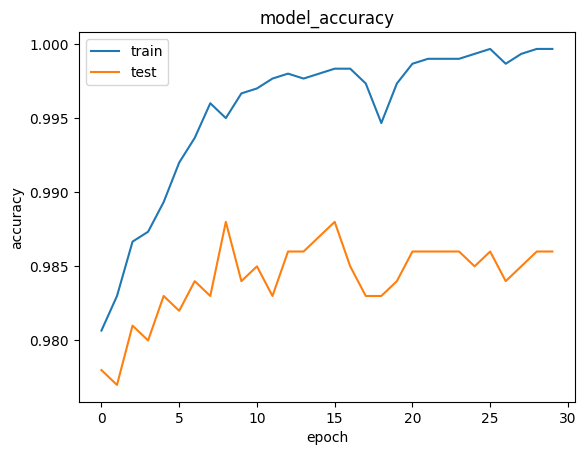

In [33]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

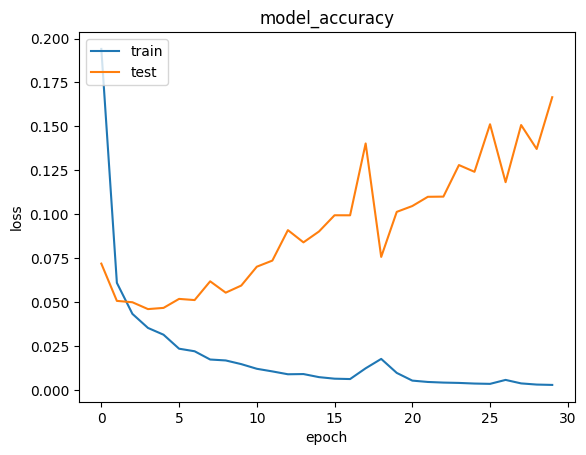

In [34]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model_accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [35]:
y_pred=classifier.predict(X_test)
y_pred

32/32 [==============================] - 0s 2ms/step


array([[7.58108627e-06],
       [1.42412964e-05],
       [8.25103780e-05],
       [6.07686162e-01],
       [7.20119453e-04],
       [9.45688772e-09],
       [4.89889353e-04],
       [2.44637590e-06],
       [9.73458464e-06],
       [9.68641611e-09],
       [4.36951677e-06],
       [4.50432012e-08],
       [2.93666581e-05],
       [7.74281972e-08],
       [5.63871436e-06],
       [5.47049740e-06],
       [3.15767723e-09],
       [1.47906294e-05],
       [1.82915028e-05],
       [5.45696763e-04],
       [5.56047307e-04],
       [2.11133127e-04],
       [1.35608449e-08],
       [2.19003368e-06],
       [3.38700629e-04],
       [7.18842086e-04],
       [2.03137984e-04],
       [5.96750033e-05],
       [4.95025888e-04],
       [1.44757840e-04],
       [8.03111197e-06],
       [1.67407999e-09],
       [4.05923347e-05],
       [6.31013559e-03],
       [6.81611846e-06],
       [1.87747862e-09],
       [1.79777174e-07],
       [9.51001857e-06],
       [5.58075999e-06],
       [7.81059382e-04],


In [36]:
y_pred=y_pred>0.05
y_pred

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_pred,y_test)

array([[973,  11],
       [ 12,   4]])

In [39]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [40]:
classifier.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2023_06_05_06_20_55_.h5


In [41]:
#hyperparameter tunig with keras tuner

!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from kerastuner.tuners import RandomSearch

<ipython-input-42-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [43]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(units=32,kernel_initializer = 'he_uniform',activation='relu',input_dim=170))
  model.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model

  

In [44]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project1',project_name='aps-fault')

In [45]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

In [46]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [47]:
mymodel=tuner.get_best_models(num_models=1)[0]

In [48]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [49]:
from tensorflow.keras import optimizers
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [50]:
tuner_second=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project3',project_name='aps-fault-sensor')

In [51]:
tuner_second.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [52]:
tuner_second.get_best_hyperparameters()[0].values

{'num_layers': 18,
 'units_0': 160,
 'units_1': 224,
 'learning_rate': 0.001,
 'units_2': 128,
 'units_3': 480,
 'units_4': 416,
 'units_5': 96,
 'units_6': 224,
 'units_7': 448,
 'units_8': 64,
 'units_9': 96,
 'units_10': 192,
 'units_11': 160,
 'units_12': 352,
 'units_13': 96,
 'units_14': 256,
 'units_15': 480,
 'units_16': 64,
 'units_17': 96,
 'units_18': 32}

In [53]:
classifier2=tuner_second.get_best_models(num_models=1)[0]

In [54]:
classifier2

ValueError: ignored